# Titanic Machine Learning from Disaster

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data description

In [2]:
# Loading the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
df_test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [7]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

In [10]:
df_test['Cabin'].fillna('Other', inplace=True)

## Preexploratory Data Analysis

In [11]:
len(df_train[df_train['Survived']==1]), len(df_train[df_train['Survived']==0])

(342, 549)

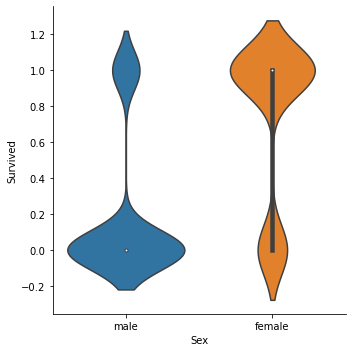

In [12]:
sns.catplot(x='Sex', y='Survived', data=df_train, kind='violin')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

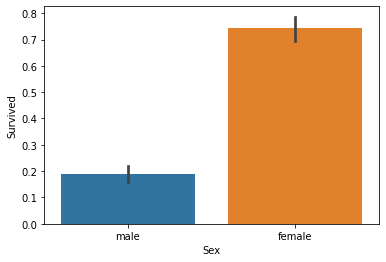

In [13]:
sns.barplot(x='Sex', y='Survived', data=df_train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

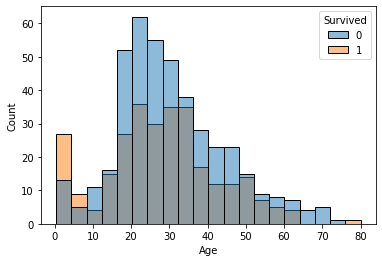

In [14]:
sns.histplot(x='Age', hue='Survived', data=df_train, bins=20)

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

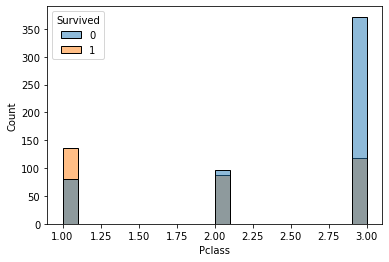

In [15]:
sns.histplot(x='Pclass', hue='Survived', data=df_train, bins=20)

In [16]:
# sns.pairplot(data=df_train, hue='Survived')

## Data Cleaning

In [17]:
df_train = pd.get_dummies(data=df_train, columns=['Sex', 'Embarked'])
df_test = pd.get_dummies(data=df_test, columns=['Sex', 'Embarked'])

In [18]:
# df_train.drop(['Sex_male', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
df_train.drop('Sex_male', axis=1, inplace=True)
df_test.drop('Sex_male', axis=1, inplace=True)

In [19]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_train['Age'].mean())

In [20]:
df_train['Cabin'] = df_train['Cabin'].fillna('Other')

In [21]:
df_train['Cabin'].unique()

array(['Other', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C

In [22]:
df_train['Cabin'].value_counts()

Other          687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [23]:
# df_train['Cabin'].str.extract('(\d+)')

In [24]:
df_train['Cabin symbol'] = df_train['Cabin'].str.extract('(\w)')
df_test['Cabin symbol'] = df_test['Cabin'].str.extract('(\w)')

In [25]:
df_test['Cabin'].str.extract('(\w)').value_counts()

O    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
dtype: int64

In [26]:
symbol_hist = df_train[df_train['Cabin symbol'] != 'O'][['Cabin symbol', 'Survived']]

<AxesSubplot:xlabel='Cabin symbol', ylabel='Count'>

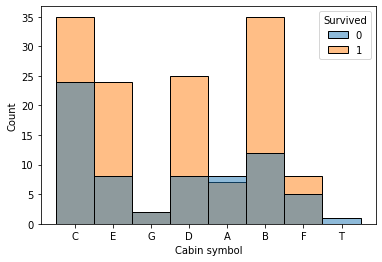

In [27]:
sns.histplot(x='Cabin symbol', hue='Survived', data=symbol_hist, bins=20)

In [28]:
# Describe the 'Cabin' with number of people in it
counts_train = df_train['Cabin'].value_counts().copy(deep=True)
counts_test = df_test['Cabin'].value_counts().copy(deep=True)

# Changing n-people cabin to 'description'
def num_peopl_in_cabin(df, n, description, counts):
    df['Cabin'][df['Cabin'].isin(counts[counts==n].index)] = description

In [29]:

num_peopl_in_cabin(df_train, 1, 'Alone', counts_train)
num_peopl_in_cabin(df_train, 2, 'Double room', counts_train)
num_peopl_in_cabin(df_train, 3, 'Three person room', counts_train)
num_peopl_in_cabin(df_train, 4, 'Four person room', counts_train)

num_peopl_in_cabin(df_test, 1, 'Alone', counts_test)
num_peopl_in_cabin(df_test, 2, 'Double room', counts_test)
num_peopl_in_cabin(df_test, 3, 'Three person room', counts_test)


# df_train['Cabin'][df_train['Cabin'].isin(counts[counts>4].index)] = 'Other'

# df_train['Cabin'][df_train['Cabin'].isin(counts[counts==1].index)] = 'Alone'
# df_train['Cabin'][df_train['Cabin'].isin(counts[counts==2].index)] = 'Double room'
# df_train['Cabin'][df_train['Cabin'].isin(counts[counts==3].index)] = 'Three person room'
# df_train['Cabin'][df_train['Cabin'].isin(counts[counts==4].index)] = 'Four person room'
# df_train['Cabin'][df_train['Cabin'].isin(counts[counts>4].index)] = 'Other'

C:\Users\Maciej\AppData\Local\Temp/ipykernel_16012/2825624458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin'][df['Cabin'].isin(counts[counts==n].index)] = description


In [30]:
df_train['Cabin'].value_counts()

Other                687
Alone                101
Double room           76
Three person room     15
Four person room      12
Name: Cabin, dtype: int64

In [31]:
df_train = pd.get_dummies(data=df_train, columns=['Cabin'])
df_test = pd.get_dummies(data=df_test, columns=['Cabin', 'Pclass', 'Cabin symbol'])

In [32]:
df_train = pd.get_dummies(data=df_train, columns=['Pclass'])

In [33]:
df_train = pd.get_dummies(data=df_train, columns=['Cabin symbol'])

In [34]:
df_train = df_train.drop('Cabin symbol_O', axis=1)
df_test = df_test.drop('Cabin symbol_O', axis=1)

In [35]:
df_test.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_Alone',
       'Cabin_Double room', 'Cabin_Other', 'Cabin_Three person room',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Cabin symbol_A', 'Cabin symbol_B',
       'Cabin symbol_C', 'Cabin symbol_D', 'Cabin symbol_E', 'Cabin symbol_F',
       'Cabin symbol_G'],
      dtype='object')

In [36]:
df_test.columns[df_test.columns.isin(df_train.columns)]

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_Alone',
       'Cabin_Double room', 'Cabin_Other', 'Cabin_Three person room',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Cabin symbol_A', 'Cabin symbol_B',
       'Cabin symbol_C', 'Cabin symbol_D', 'Cabin symbol_E', 'Cabin symbol_F',
       'Cabin symbol_G'],
      dtype='object')

In [37]:
df_train.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Cabin_Alone', 'Cabin_Double room', 'Cabin_Four person room',
       'Cabin_Other', 'Cabin_Three person room', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Cabin symbol_A', 'Cabin symbol_B', 'Cabin symbol_C',
       'Cabin symbol_D', 'Cabin symbol_E', 'Cabin symbol_F', 'Cabin symbol_G',
       'Cabin symbol_T'],
      dtype='object')

In [38]:
df_test['Cabin symbol_T'] = 0
df_test['Cabin_Four person room'] = 0

In [39]:
df_train = df_train.reindex(columns=['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Cabin_Alone', 'Cabin_Double room', 'Cabin_Four person room',
       'Cabin_Other', 'Cabin_Three person room', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Cabin symbol_A', 'Cabin symbol_B', 'Cabin symbol_C',
       'Cabin symbol_D', 'Cabin symbol_E', 'Cabin symbol_F', 'Cabin symbol_G',
       'Cabin symbol_T', 'Survived'])

In [40]:
df_test = df_test.reindex(columns=['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Cabin_Alone', 'Cabin_Double room', 'Cabin_Four person room',
       'Cabin_Other', 'Cabin_Three person room', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Cabin symbol_A', 'Cabin symbol_B', 'Cabin symbol_C',
       'Cabin symbol_D', 'Cabin symbol_E', 'Cabin symbol_F', 'Cabin symbol_G',
       'Cabin symbol_T'])

In [41]:
df_test.isna().sum()

PassengerId                0
Name                       0
Age                        0
SibSp                      0
Parch                      0
Ticket                     0
Fare                       0
Sex_female                 0
Embarked_C                 0
Embarked_Q                 0
Embarked_S                 0
Cabin_Alone                0
Cabin_Double room          0
Cabin_Four person room     0
Cabin_Other                0
Cabin_Three person room    0
Pclass_1                   0
Pclass_2                   0
Pclass_3                   0
Cabin symbol_A             0
Cabin symbol_B             0
Cabin symbol_C             0
Cabin symbol_D             0
Cabin symbol_E             0
Cabin symbol_F             0
Cabin symbol_G             0
Cabin symbol_T             0
dtype: int64

## Views of the best correlated features

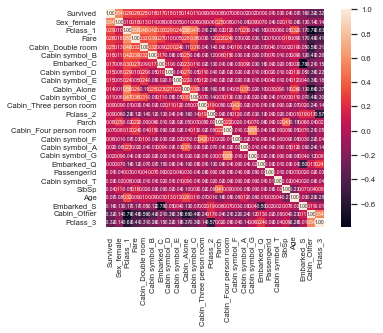

In [42]:
corrmat = df_train.corr() 
cols = corrmat.nlargest(df_train.shape[1], 'Survived')['Survived'].index 
cm = np.corrcoef(df_train[cols].values.T) 
sns.set(font_scale=0.7) 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)

## Model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [44]:
X_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y_train = df_train['Survived']

X_test = df_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [45]:
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [46]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [47]:
len(y_train[y_train==1]), len(y_train[y_train==0])

(549, 549)

In [48]:
sc = StandardScaler()

X_train_std = sc.fit_transform(X_tr)
X_val = sc.transform(X_val)

In [49]:
clf = LogisticRegression()

clf.fit(X_train_std, y_tr)
clf.score(X_val, y_val)

0.7818181818181819

In [50]:
X_test = sc.transform(X_test)
predictions = clf.predict(X_test)

In [53]:
submissionStacking = pd.DataFrame({ 'PassengerId': df_test["PassengerId"],'Survived': predictions })
submissionStacking.to_csv("submission.csv", index=False)